In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("bank_transactions_data_2.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [8]:
# 4.1 Drop irrelevant columns (identifiers, timestamps, IPs)
df = df.drop(['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'PreviousTransactionDate', 'TransactionDate'], axis=1)

# 4.2 Encode categorical columns
categorical_cols = ['TransactionType', 'Location', 'MerchantID', 'Channel', 'CustomerOccupation']
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])



In [9]:
# 4.3 Define features (X) and target (y)
# We'll assume TransactionType (Debit=0, Credit=1) is the target variable
X = df.drop('TransactionType', axis=1)
y = df['TransactionType']

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n✅ Feature Scaling Completed!")


✅ Feature Scaling Completed!


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)
print(f"\nTraining Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")



Training Data Shape: (1758, 9)
Testing Data Shape: (754, 9)


In [12]:
kernels = ['linear', 'poly']
accuracies = {}

for kernel in kernels:
    print(f"\n🔹 Training SVM with {kernel.upper()} kernel...")
    model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies[kernel] = acc * 100

    print(f"\n✅ Accuracy ({kernel} kernel): {acc*100:.2f}%")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))



🔹 Training SVM with LINEAR kernel...

✅ Accuracy (linear kernel): 78.12%
Confusion Matrix:
 [[  0 165]
 [  0 589]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       165
           1       0.78      1.00      0.88       589

    accuracy                           0.78       754
   macro avg       0.39      0.50      0.44       754
weighted avg       0.61      0.78      0.69       754


🔹 Training SVM with POLY kernel...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



✅ Accuracy (poly kernel): 78.12%
Confusion Matrix:
 [[  2 163]
 [  2 587]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.02       165
           1       0.78      1.00      0.88       589

    accuracy                           0.78       754
   macro avg       0.64      0.50      0.45       754
weighted avg       0.72      0.78      0.69       754




📊 Accuracy Comparison (SVM Kernels):
LINEAR Kernel: 78.12%
POLY Kernel: 78.12%


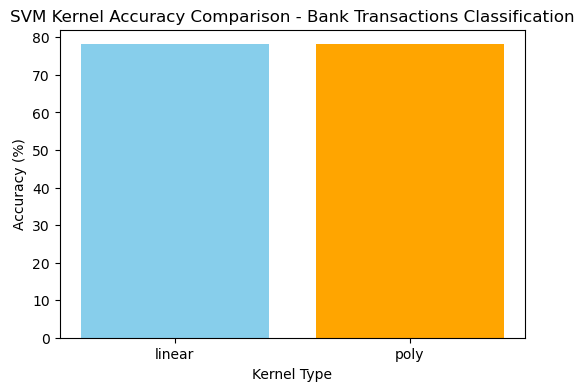

In [13]:
print("\n📊 Accuracy Comparison (SVM Kernels):")
for k, v in accuracies.items():
    print(f"{k.upper()} Kernel: {v:.2f}%")

# Bar chart for comparison
plt.figure(figsize=(6, 4))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'orange'])
plt.title("SVM Kernel Accuracy Comparison - Bank Transactions Classification")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy (%)")
plt.show()

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

linear_model = SVC(kernel='linear', C=1.0)
poly_model = SVC(kernel='poly', C=1.0, degree=3)

linear_model.fit(X_train, y_train)
poly_model.fit(X_train, y_train)

print("Linear accuracy:", accuracy_score(y_test, linear_model.predict(X_test)))
print("Polynomial accuracy:", accuracy_score(y_test, poly_model.predict(X_test)))

print("Support Vectors (Linear):", len(linear_model.support_))
print("Support Vectors (Poly):", len(poly_model.support_))


Linear accuracy: 0.7811671087533156
Polynomial accuracy: 0.7811671087533156
Support Vectors (Linear): 881
Support Vectors (Poly): 887
